In [1]:
using PyPlot
using QuantumOptics

In [2]:
#Definiendo la base
N = 3;
b = NLevelBasis(N);
#Estados;
psi1 = nlevelstate(b, 1);
psi2 = nlevelstate(b, 2);
psi3 = nlevelstate(b, 3);

In [3]:
#Operadores
Sz11= transition(b, 1, 1);
Sz22= transition(b, 2, 2);
Sz33= transition(b, 3, 3);

Sz12=(Sz22-Sz11)/2;
Sz23=(Sz33-Sz22)/2;
#Operadores escalera
S23 = transition(b, 3, 2);
S12 = transition(b, 2, 1);

In [1]:
#acomplamiento
g=0.02;
#frecuencia de transicion
ω=1;
#tiempo 
t0 = Array(0:0.01:2*pi);
t_eff = t0./((g^2)/(2*ω));
t_tra=[(pi)/((g^2)/(ω))];
#n=3;
#Frecuencias de los campos
ν_1=ω/2+(g^2)/(15*ω); #aproximacion
ancho = (g^2)/(2*ω);
ν=Array(0.49:ancho/30:0.51);
#t_eff=[0,t_tra]
#ν=[0,ν_1]
ν[1505] #0.5000266666666666

0.5000266666666666

In [5]:
Evol = []

for i=1:size(ν,1)
    #Funcion hamiltoniana dependiente del tiempo, con ν que varia
    H(t, psi)=2(Sz12+Sz23)ω + g*(cos(ν[i]*t)*(S12+S12') + cos(3*ν[i]*t)*(S23+S23'));
    #Evolucion del estado
    tout, Psit = timeevolution.schroedinger_dynamic(t_eff, psi1, H);
    push!(Evol, Psit);
end


In [6]:
  #  H(t, psi)=2(Sz12+Sz23)ω + g*(cos(ν_1*t)*(S12+S12') + cos(3*ν_1*t)*(S23+S23'));
    #Evolucion del estado
 #   tout, Psit = timeevolution.schroedinger_dynamic(t_eff, psi1, H);

In [7]:
Puntos=[]
Prob=zeros(size(ν,1),size(t0,1));
Promedios=zeros(size(ν,1));

for i=1:size(ν,1)
    push!(Puntos,[])       
    for j=1:size(t0,1)
        push!(Puntos[i],psi3'Evol[i][j]) #Productos internos
        Prob[i,j]=abs(Puntos[i][j])^2 #Calculo de la probabilidad
    end
    Promedios[i]=sum(Prob[i,:])/(2*pi/g); 
end


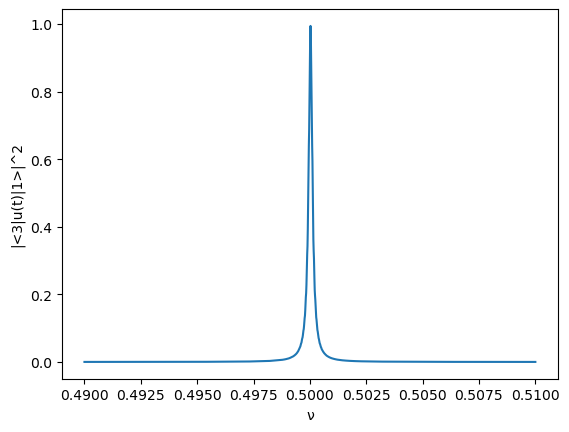

PyObject Text(24.500000000000007, 0.5, '|<3|u(t)|1>|^2')

In [8]:
plot(ν,Promedios)
xlabel("ν")
ylabel("|<3|u(t)|1>|^2")

In [9]:
S11t=real(expect(Sz11,Evol[1506]))
S22t=real(expect(Sz22,Evol[1506]));
S33t=real(expect(Sz33,Evol[1506]));

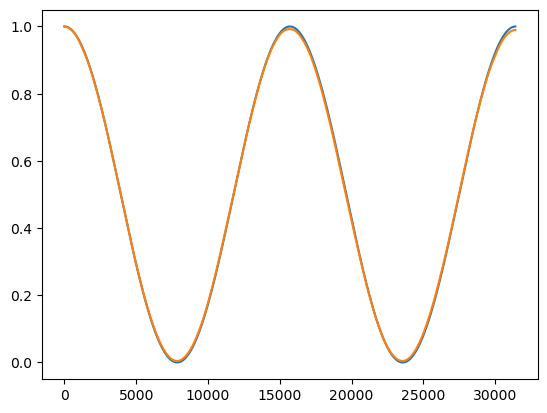

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x0000000001B95F40>

In [10]:
factor=(((g^2)/(2*ω)));
plot(t_eff, cos.(t_eff*factor).^2)
plot(t_eff,S11t)

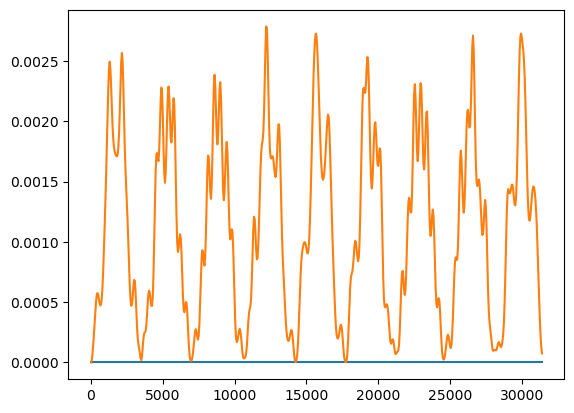

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x0000000001A111C0>

In [11]:
plot(t_eff,zeros(size(t_eff,1)))
plot(t_eff,S22t)

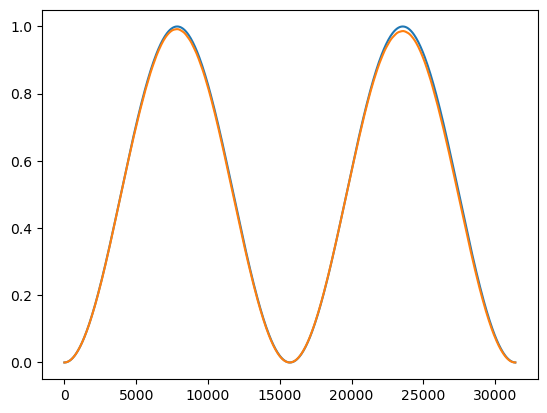

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x0000000001A74970>

In [12]:
plot(t_eff, sin.(t_eff*factor).^2)
plot(t_eff,S33t)